In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [15]:
crime= pd.read_csv(r'/Users/cjmartinez323/Desktop/ML Class/UCLA_ML-master/crime19.csv')

In [16]:
print(crime.shape)

(2115055, 28)


In [17]:
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [18]:
labels=crime[['AREA ', 'AREA NAME', 'Crm Cd','Crm Cd Desc', 'Premis Cd','Premis Desc','Weapon Used Cd', 'Weapon Desc','Status','Status Desc']]

In [19]:
crime=crime.drop(['DATE OCC', 'AREA NAME',
       'Crm Cd Desc','Mocodes',
          'Premis Desc',
        'Weapon Desc',  'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'LAT','LON'], axis=1)

In [20]:
crime=crime.rename(columns={'TIME OCC':'time' ,'DR_NO':'id', 'Date Rptd':'date', 'AREA ':'area', 'Rpt Dist No':'district_number', 'Part 1-2':'part', 'Crm Cd':'crime_code', 
       'Vict Age':'age', 'Vict Sex':'sex', 'Vict Descent':'descent', 'Premis Cd':'premis', 
       'Weapon Used Cd':'weapon', 'Status':'status', 'LOCATION':'location'})

In [21]:
crime.isnull().sum()

id                       0
date                     0
time                     0
area                     0
district_number          0
part                     0
crime_code               0
age                      0
sex                 196671
descent             196717
premis                  53
weapon             1404685
status                   3
location                 0
dtype: int64

In [22]:
token='N'
crime.sex=crime.sex.fillna(token)
crime.weapon=crime.weapon.fillna(token)
crime.descent=crime.descent.fillna(token)

crime=crime.dropna(how='any')
print(crime.isnull().sum())

id                 0
date               0
time               0
area               0
district_number    0
part               0
crime_code         0
age                0
sex                0
descent            0
premis             0
weapon             0
status             0
location           0
dtype: int64


In [23]:
crime['month_year'] =pd.to_datetime(crime['date']).dt.to_period('M')
crime=crime.drop(['date'], axis=1)

In [24]:
# there are many data which age = 0 doesn't make any  sense
crime[crime.age==0].shape

(369863, 14)

In [25]:
# make timeline same with budget
crime_11_12=crime[crime.month_year>'2011-11'].sort_values(by='month_year').reset_index(drop=True)

### Budegt

In [27]:
budget=pd.read_csv(r'/Users/cjmartinez323/Desktop/ML Class/UCLA_ML-master/Police_Budget_Activity.csv')

In [28]:
#drop columns after total expenditures
budget=budget.iloc[:,:32]

#drop missing values morethan 20000.
budget=budget.drop(['ADOPTED EXPENSE BUDGET','REVENUE SOURCE CATEGORY','REVENUE SOURCE CATEGORY NAME','REVENUE SOURCE CLASS','REVENUE SOURCE CLASS NAME','REVENUE SOURCE','REVENUE SOURCE NAME'], axis=1)
#drop same values columns
#'DEPARTMENT', 'DEPARTMENT NAME','AFR TYPE','DEPARTMENTAL INDICATOR','FUND GROUP','FUND GROUP NAME'bu
budget=budget.drop(['FUND GROUP NAME','FUND NAME','FISCAL PERIOD NAME','FUND TYPE NAME','DEPARTMENT', 'DEPARTMENT NAME','ACCOUNT NAME', 'CAFR TYPE','ACCOUNT TYPE NAME','DEPARTMENTAL INDICATOR','ACCOUNT GROUP NAME','FUND GROUP','FUND GROUP NAME'], axis=1)

In [29]:
token='UNK'
budget=budget.fillna(token)

In [30]:
a=budget.columns.map(lambda x: x.lower().replace(' ', '_'))
budget.columns=a
budget['month_year']=pd.to_datetime(budget['fiscal_period'], format='%Y%m').dt.to_period('M')
budget=budget.drop(['fiscal_period'], axis=1)
budget=budget.sort_values(by='month_year').reset_index(drop=True)

In [31]:
# total cases of crime by month
total=crime_11_12.groupby(['month_year']).size().to_frame()
crime_11_12=pd.merge(crime_11_12, total, on='month_year',how='left')

In [32]:
#total budget by month
total_budget=budget.groupby('month_year')['total_expenditures'].sum().to_frame()
crime_11_12=pd.merge(crime_11_12,total_budget, on='month_year', how='left')

In [33]:
crime_11_12

,id,time,area,district_number,part,crime_code,age,sex,descent,premis,weapon,status,location,month_year,0,total_expenditures
0,111721860,2200,17,1756,1,330,32,M,A,104.0,N,IC,17600 MAYALL ST,2011-12,16246,6.820457e+08
1,111522020,2245,15,1527,1,442,0,M,W,404.0,N,IC,11000 VICTORY BL,2011-12,16246,6.820457e+08
2,111432710,1220,14,1483,1,510,0,N,N,101.0,N,IC,LINCOLN,2011-12,16246,6.820457e+08
3,111924380,1200,19,1987,2,354,55,M,O,501.0,N,IC,8600 KATHERINE AV,2011-12,16246,6.820457e+08
4,110120970,2020,1,191,1,510,0,N,N,101.0,N,IC,17TH ST,2011-12,16246,6.820457e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732870,201711824,1400,17,1761,1,331,49,M,O,509.0,N,IC,21500 LASSEN ST,2020-08,8,1.447240e+08
1732871,201912858,1,19,1969,1,121,26,F,O,502.0,400,IC,ARLETA,2020-08,8,1.447240e+08
1732872,200115750,1620,1,121,2,354,36,F,B,710.0,N,IC,900 W TEMPLE ST,2020-08,8,1.447240e+08
1732873,202012875,1000,20,2029,2,649,42,M,W,502.0,N,IC,500 S WESTMORELAND AV,2020-08,8,1.447240e+08


In [34]:
#rename 
crime_new=crime_11_12.rename(columns={0:'total_crime'})

In [35]:
crime_new=crime_new.drop(columns=['id', 'location'], axis=1)

In [36]:
crime_new['total_expenditures']=crime_new['total_expenditures'].map(lambda x: "{:.2f}".format(float(x)))

In [37]:
# change data type of time to hours and minutes
crime_new['time']=crime_new['time'].astype('str')
crime_new['time']=['{0}'.format(i.zfill(4)) for i in crime_new['time']]
crime_new['time']=pd.to_datetime(crime_new['time'],format='%H%M').dt.strftime('%H:%M')

In [72]:
crime_new.sample(n=10,random_state=0)

,time,time_class,area,district_number,part,crime_code,age,sex,descent,premis,weapon,status,month_year,total_crime,total_expenditures
874393,21:35,3,19,1984,2,946,51,M,B,101.0,500,AA,2016-04,18727,114517905.99
1540110,16:00,3,11,1157,1,440,46,M,H,109.0,N,IC,2019-02,16525,132885503.87
1449133,20:10,3,12,1249,2,623,0,X,X,101.0,400,AA,2018-09,18567,132432113.98
189938,14:00,3,4,409,2,354,31,M,H,501.0,N,IC,2012-11,15693,95574535.80
1691824,19:00,3,19,1974,1,440,27,F,B,502.0,N,IC,2019-10,18549,126258667.22
641851,13:00,3,10,1001,2,946,68,M,W,501.0,N,IC,2015-03,17976,158099703.21
432018,13:00,3,21,2134,2,946,15,M,W,501.0,N,IC,2014-02,13752,103819720.53
369187,12:00,1,17,1767,2,354,23,F,A,502.0,N,IC,2013-10,16371,146598772.36
62590,14:50,3,1,159,2,624,45,M,H,101.0,400,IC,2012-03,16678,94697140.41
1600892,03:00,0,3,325,1,236,48,M,H,501.0,500,AO,2019-06,18456,182767601.34


In [39]:
temp=[]
# 根据差值进行打分
for i in crime_new['time']:
    a = 0
    if (i >= "00:00") and (i <="06:00"):
        a= 0
    elif (i>'06:00') and (i <='12:00'):
        a=1
    elif (i>'12:00') and (i<='06:00'):
        a=2
    else:
        a=3
    temp.append(a)

In [40]:
crime_new['time_class']=temp

In [41]:
#0: midnight 1: morning 2:afternoon 3:evening
crime_new.head()

,time,area,district_number,part,crime_code,age,sex,descent,premis,weapon,status,month_year,total_crime,total_expenditures,time_class
0,22:00,17,1756,1,330,32,M,A,104.0,N,IC,2011-12,16246,682045743.42,3
1,22:45,15,1527,1,442,0,M,W,404.0,N,IC,2011-12,16246,682045743.42,3
2,12:20,14,1483,1,510,0,N,N,101.0,N,IC,2011-12,16246,682045743.42,3
3,12:00,19,1987,2,354,55,M,O,501.0,N,IC,2011-12,16246,682045743.42,1
4,20:20,1,191,1,510,0,N,N,101.0,N,IC,2011-12,16246,682045743.42,3


In [42]:
# move time_class to front
mid = crime_new['time_class']
crime_new.drop(labels=['time_class'], axis=1, inplace = True)
crime_new.insert(1, 'time_class', mid)

In [232]:
crime_new.sample(n=10,random_state=2)

,time,time_class,area,district_number,part,crime_code,age,sex,descent,premis,weapon,status,month_year,total_crime,total_expenditures,year
46520,22:00,3,12,1258,2,930,16,F,H,501.0,511,IC,2012-02,15278,96190631.18,2012
1122636,00:01,0,17,1785,2,354,37,F,B,501.0,N,IC,2017-05,19649,nan,2017
1717924,12:10,3,5,551,1,421,49,M,W,101.0,N,AA,2019-12,18154,nan,2019
1088700,18:00,3,2,248,1,220,23,M,H,502.0,400,IC,2017-03,19589,114398967.34,2017
595018,21:00,3,17,1737,1,330,23,F,O,101.0,N,IC,2014-12,17076,108487680.60,2014
1430900,12:30,3,18,1824,1,310,70,F,B,501.0,N,AA,2018-08,19786,126572239.16,2018
1455170,22:30,3,6,657,2,624,26,M,B,501.0,400,AO,2018-10,19853,122883330.94,2018
860709,11:15,1,8,828,1,351,60,F,O,124.0,400,AA,2016-03,18500,109400422.51,2016
410492,18:30,3,7,722,1,442,28,M,H,404.0,N,AA,2014-01,15488,109085917.29,2014
1329236,08:45,1,17,1762,2,740,39,M,H,501.0,N,AA,2018-03,19152,130212100.01,2018


In [65]:
crime_new.month_year.unique()

<PeriodArray>
['2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
 '2012-07', '2012-08', '2012-09',
 ...
 '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05',
 '2020-06', '2020-07', '2020-08']
Length: 105, dtype: period[M]

In [ ]:
##Get how we want to aggregate the data 

In [70]:
crime_new.district_number.nunique()

1278

In [47]:
import dexplot as dxp
import seaborn as sns

In [207]:
crime_new.area.value_counts()

12    118336
3     110582
15     93345
14     92319
18     90751
1      84856
19     84044
13     81805
6      81768
9      81461
11     81106
21     79915
20     79746
17     77544
5      73812
2      73609
8      73584
7      73297
10     72781
4      64910
16     63304
Name: area, dtype: int64

In [208]:
crime_new['year'] = crime_new.month_year.values.astype('datetime64[Y]')
crime_new['year'] = pd.to_datetime(crime_new['year']).dt.year

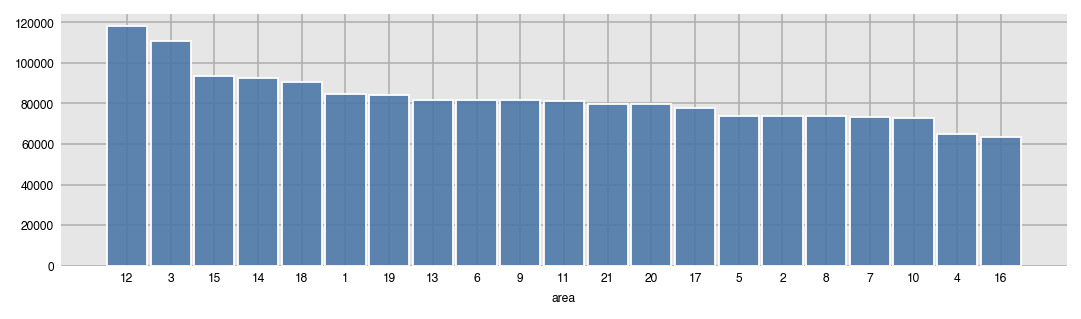

In [230]:
dxp.count(val='area',data=crime_new)

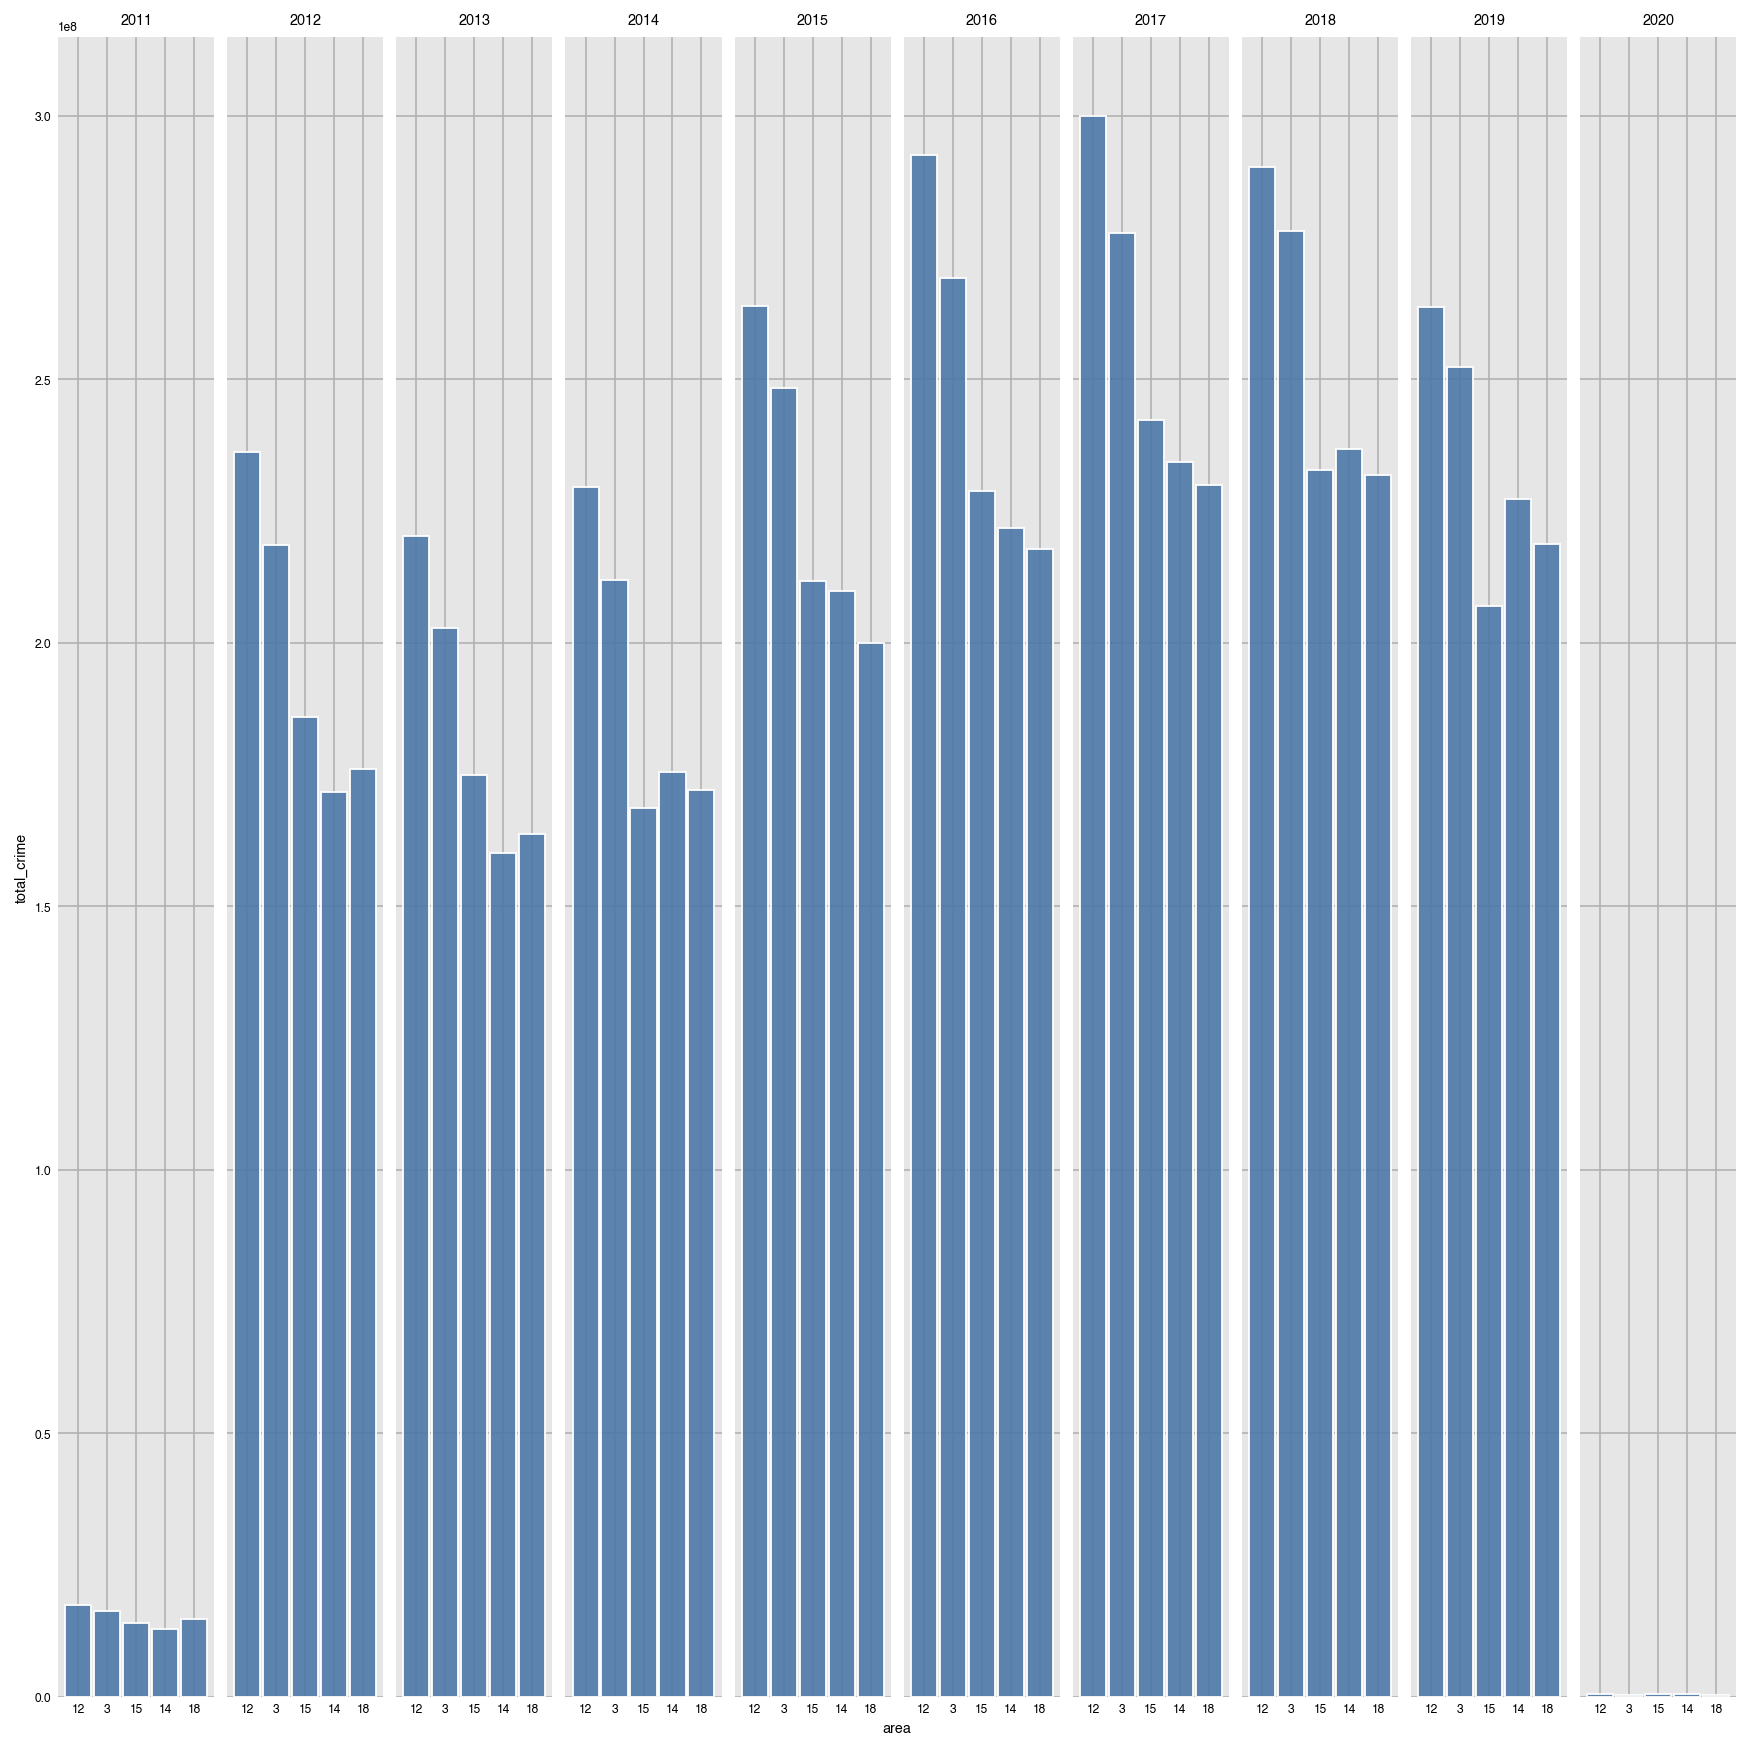

In [236]:
dxp.bar(x='area', y='total_crime', data=crime_new, aggfunc='sum',
        col='year',figsize=(12,12),size=0.9, x_order= 'top 5')
##, col='area'##split='time_class'

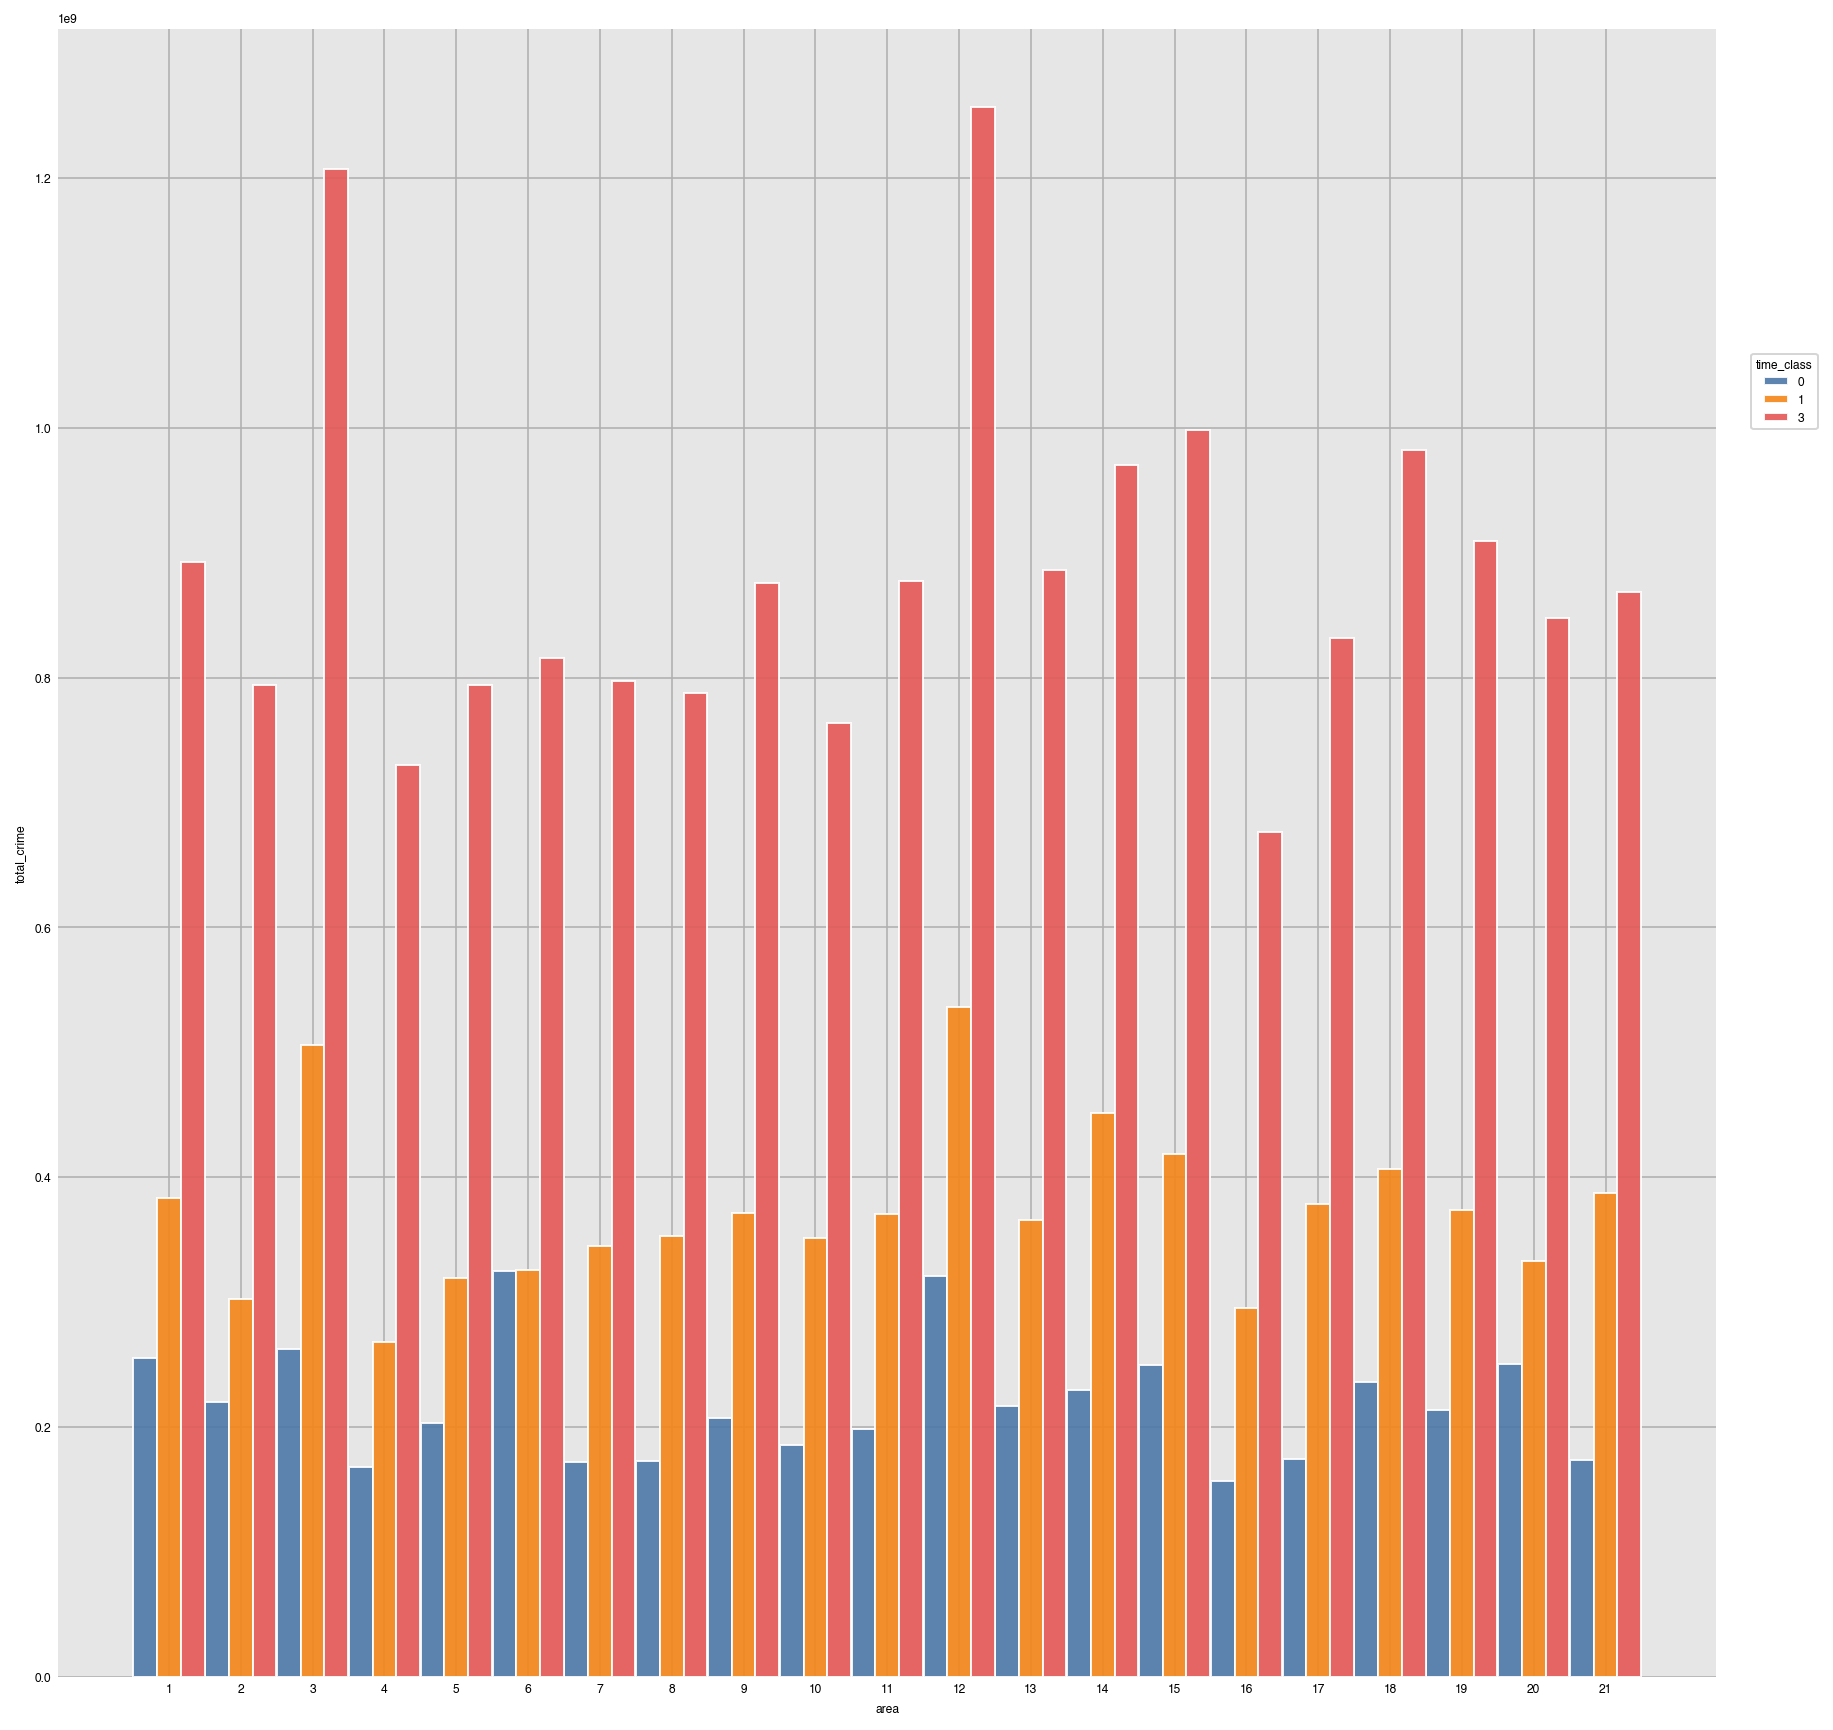

In [240]:
dxp.bar(x='area', y='total_crime', data=crime_new, aggfunc='sum', 
        split='time_class',figsize=(12,12),size=0.99)
##, col='area'

In [216]:
##Re-read data in order to find Area names for Area Codes
crime2= pd.read_csv(r'/Users/cjmartinez323/Desktop/ML Class/UCLA_ML-master/crime19.csv')

In [217]:
##Top crime areas 
top_areas = [3,12,15,14,18]
df_top = crime2[crime2['AREA '].isin (top_areas)]

In [218]:
df_top['AREA NAME'].unique()

array(['Pacific', 'Southwest', 'Southeast', '77th Street', 'N Hollywood'],
      dtype=object)

In [228]:
df_top.sort_values(by='AREA ',inplace=True)
df_top.sample(n=10,random_state=0)

/Users/cjmartinez323/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
1553839,171513347,06/09/2017 12:00:00 AM,05/17/2017 12:00:00 AM,800,15,N Hollywood,1516,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,6600 LANKERSHIM BL,NaN,34.1903,-118.3877
1897524,181505716,02/01/2018 12:00:00 AM,01/31/2018 12:00:00 AM,1430,15,N Hollywood,1522,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,12900 HAMLIN ST,NaN,34.1885,-118.4137
1883359,181517835,09/14/2018 12:00:00 AM,09/14/2018 12:00:00 AM,10,15,N Hollywood,1526,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,6200 LANKERSHIM BL,NaN,34.1831,-118.3856
1922869,190320841,09/16/2019 12:00:00 AM,03/01/2019 12:00:00 AM,800,3,Southwest,338,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,IC,Invest Cont,812.0,860.0,NaN,NaN,3000 S VERMONT AV,NaN,34.0274,-118.2915
1896793,181819581,09/27/2018 12:00:00 AM,09/21/2018 12:00:00 AM,1630,18,Southeast,1827,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,1700 E 92ND ST,NaN,33.9533,-118.2430
1896166,180316436,07/09/2018 12:00:00 AM,07/05/2018 12:00:00 AM,1930,3,Southwest,393,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,4100 LEIMERT BL,NaN,34.0100,-118.3239
125021,101412285,05/08/2010 12:00:00 AM,05/06/2010 12:00:00 AM,1950,14,Pacific,1464,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,JEFFERSON,CENTINELA,33.9824,-118.4073
1727100,181520904,11/08/2018 12:00:00 AM,11/07/2018 12:00:00 AM,1230,15,N Hollywood,1512,2,624,BATTERY - SIMPLE ASSAULT,...,AA,Adult Arrest,624.0,NaN,NaN,NaN,6900 COLDWATER CANYON AV,NaN,34.1958,-118.4138
868123,141227723,12/31/2014 12:00:00 AM,12/30/2014 12:00:00 AM,2050,12,77th Street,1263,2,624,BATTERY - SIMPLE ASSAULT,...,AA,Adult Arrest,624.0,NaN,NaN,NaN,7900 S WESTERN AV,NaN,33.9673,-118.3090
569535,121208607,03/07/2012 12:00:00 AM,03/07/2012 12:00:00 AM,1435,12,77th Street,1259,1,350,"THEFT, PERSON",...,IC,Invest Cont,350.0,NaN,NaN,NaN,800 E 77TH ST,NaN,33.9694,-118.2608
